<a href="https://colab.research.google.com/github/BrajanNieto/Tareas_Programacion101_BrajanNieto/blob/main/90_Examen9_Programacion%20101%20GRUPO%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Práctica Final - Programación 101**
## Maestría de Ciencia de Datos e Inteligencia Artificial
### Programación 101

**Profesor del curso:**  
Mg. John Caballero Terrazos  
[jcaballero@utec.edu.pe](mailto:jcaballero@utec.edu.pe)

**Integrantes:**  
Piero Diaz
[piero.diaz.c@utec.edu.pe](mailto:piero.diaz@utec.edu.pe)

Rodrigo Guedes
[rodrigo.guedes@utec.edu.pe](mailto:rodrigo.guedes@utec.edu.pe)

Brajan Nieto
[brajan.nieto@utec.edu.pe](mailto:brajan.nieto@utec.edu.pe)

Julio Salgado
[julio.salgado@utec.edu.pe](mailto:julio.salgado@utec.edu.pe)


<img src="https://pregrado.utec.edu.pe/sites/default/files/logo-utec-h_0_0.svg" width="190" alt="Logo UTEC" loading="lazy" typeof="foaf:Image">

In [1]:
# Librerías que se usaron en el desarrollo de la práctica
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest, norm #Esto lo use a para imputación de valores

Análisis de los datos

In [104]:
# Cargar el archivo CSV
file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)
print(df.head(5))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [105]:
# Mostrar información general del DataFrame
print("\nInformación general del DataFrame:")
print(df.info())


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperl

In [108]:
# Convertir valores a numéricos
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [109]:
# Mostrar información general del DataFrame
print("\nInformación general del DataFrame:")
print(df.info())


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperl

In [61]:
# Resumen estadístico de las columnas numéricas
print("\nResumen estadístico de las columnas numéricas:")
print(df.describe())


Resumen estadístico de las columnas numéricas:
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


In [74]:
# Resumen estadístico de las columnas categóricas
print("\nResumen estadístico de las columnas categóricas:")
print(df.describe(include=['object']))


Resumen estadístico de las columnas categóricas:
        customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     7590-VHVEG   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7043        7043            7043            7043   
unique           3           3               3               3   
top             No  


Generando scatter matrix plot...


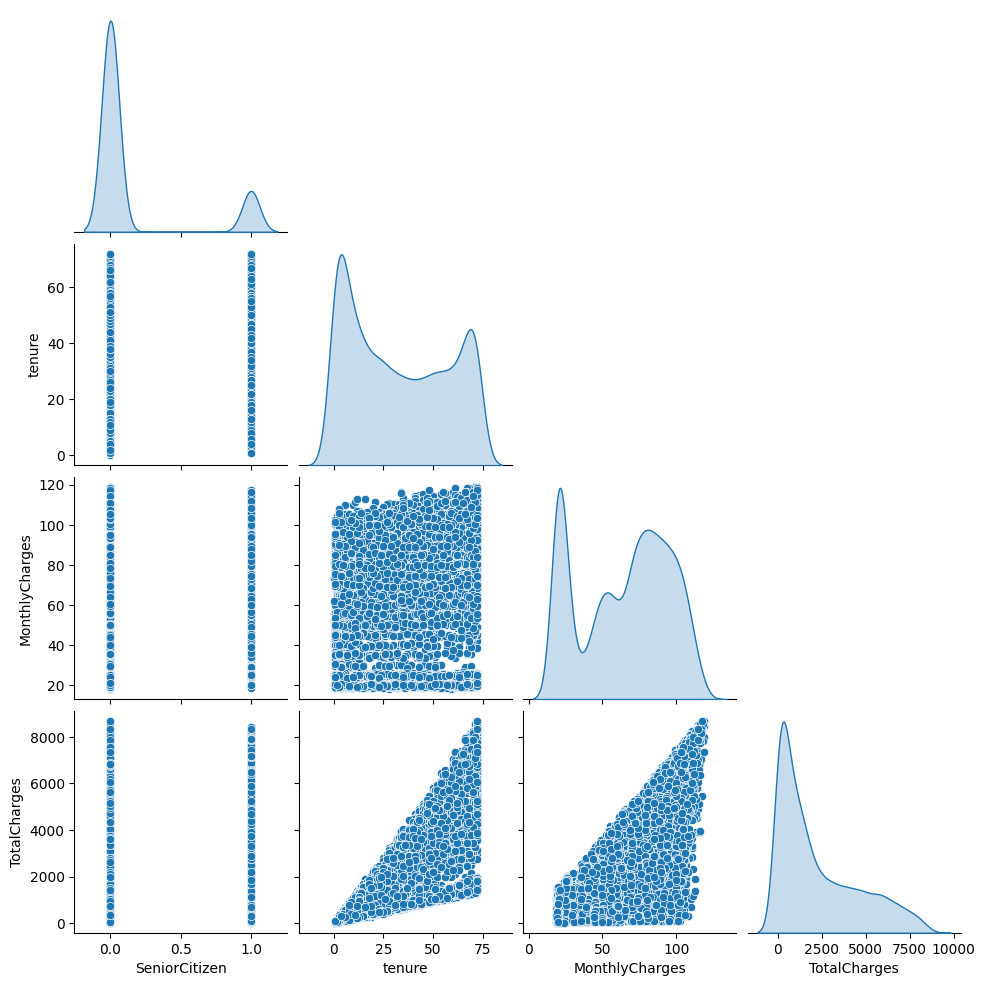

In [75]:
# Generar un scatter matrix plot para las columnas numéricas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

if len(numerical_cols) > 1:
    print("\nGenerando scatter matrix plot...")
    sns.pairplot(df[numerical_cols], diag_kind='kde', corner=True)
    plt.show()
else:
    print("\nNo hay suficientes columnas numéricas para generar un scatter matrix plot.")

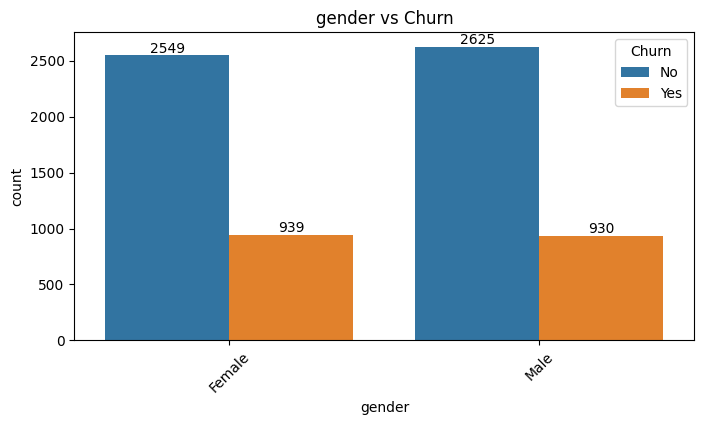

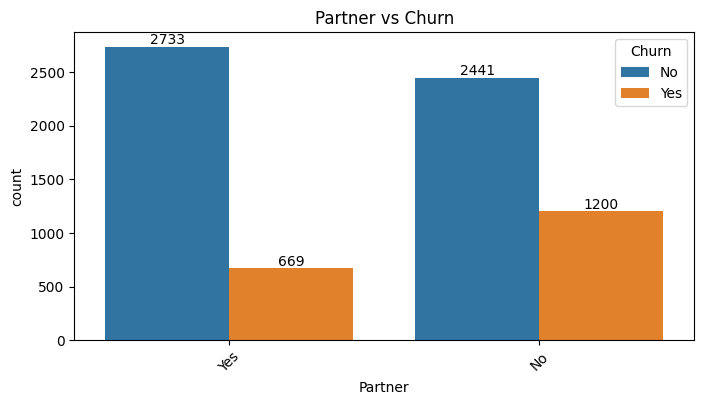

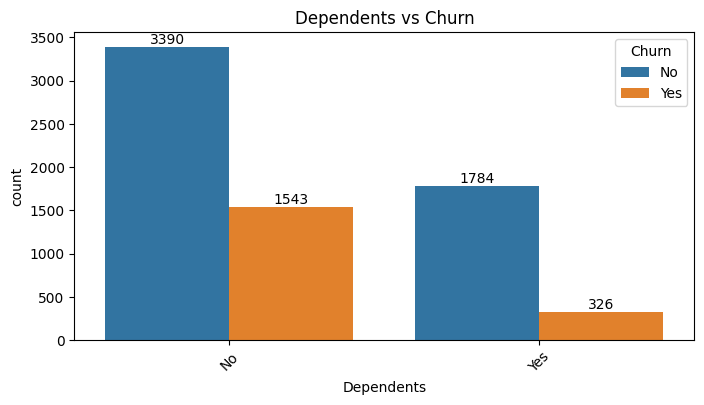

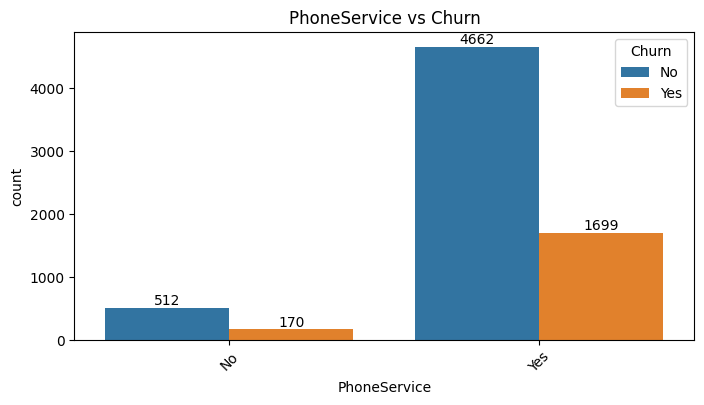

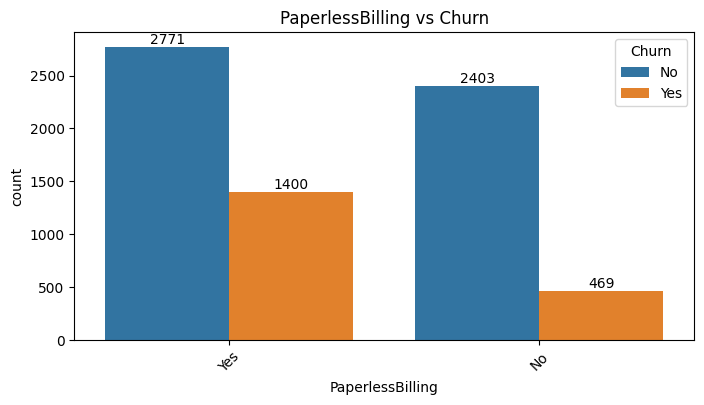

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling'] + [
    col for col in df.columns if col.startswith('MultipleLines_') or
    col.startswith('InternetService_') or
    col.startswith('OnlineSecurity_') or
    col.startswith('OnlineBackup_') or
    col.startswith('DeviceProtection_') or
    col.startswith('TechSupport_') or
    col.startswith('Contract_') or
    col.startswith('PaymentMethod_') or
    col.startswith('StreamingMovies_') or
    col.startswith('StreamingTV_')]

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)

    # Agregar etiquetas numéricas en las barras
    for p in ax.patches:
        height = p.get_height()  # Altura de la barra
        if not pd.isna(height) and height > 0:  # Evitar etiquetas para valores NaN o 0
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),  # Coordenadas de la etiqueta
                        ha='center', va='center',
                        fontsize=10, color='black',
                        xytext=(0, 5),
                        textcoords='offset points')  # Desplazamiento de la etiqueta

    plt.show()

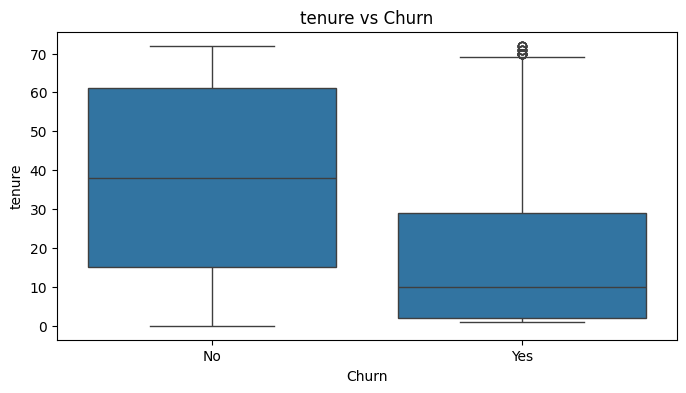

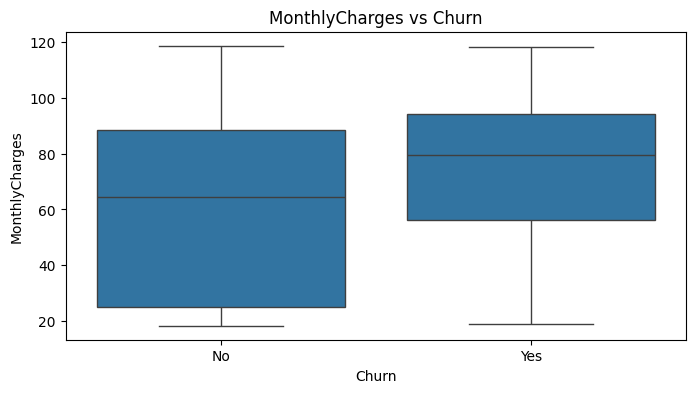

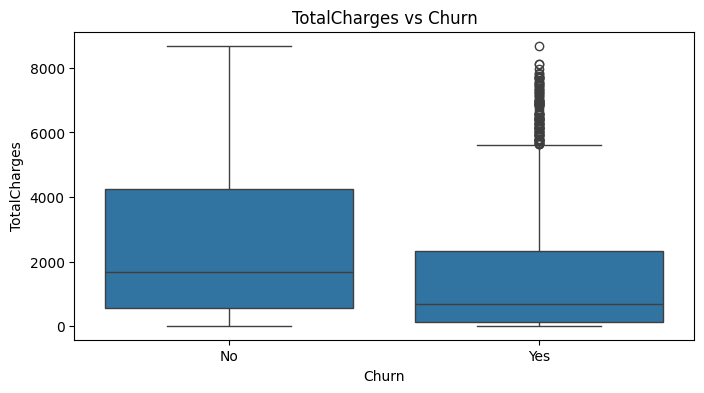

In [77]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']  # Ajusta según tus columnas

for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs Churn')
    plt.show()



Generando heatmap de correlación...


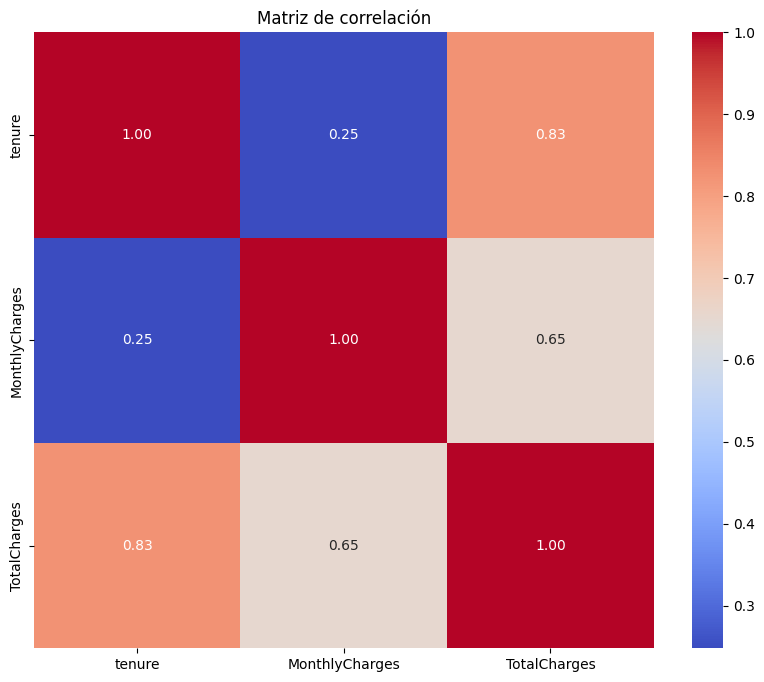

In [78]:
# Visualizar la correlación entre las variables numéricas con un heatmap
if len(numerical_cols) > 1:
    print("\nGenerando heatmap de correlación...")
    correlation_matrix = df[numerical_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
    plt.title('Matriz de correlación')
    plt.show()
else:
    print("\nNo hay suficientes columnas numéricas para generar un heatmap de correlación.")



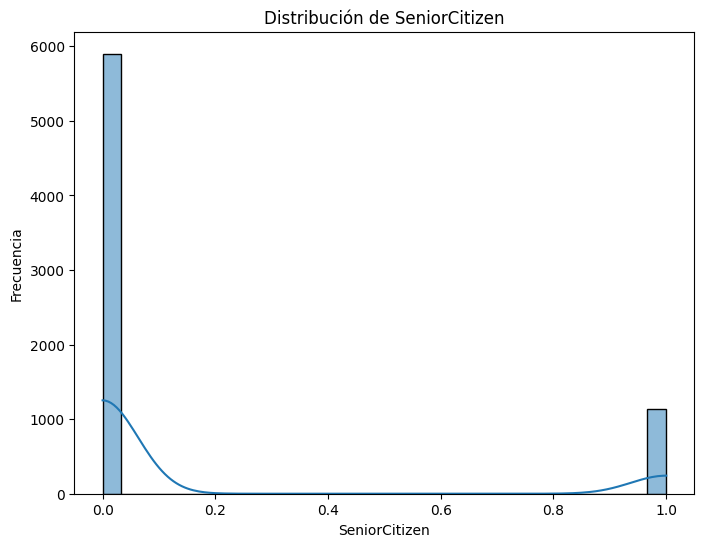

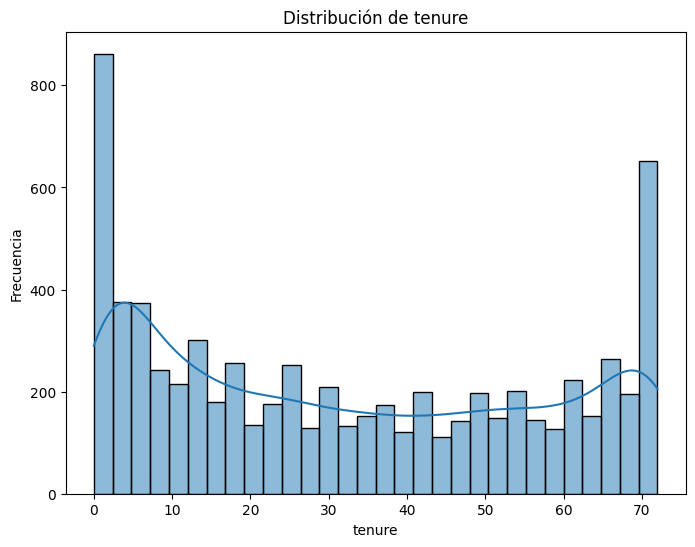

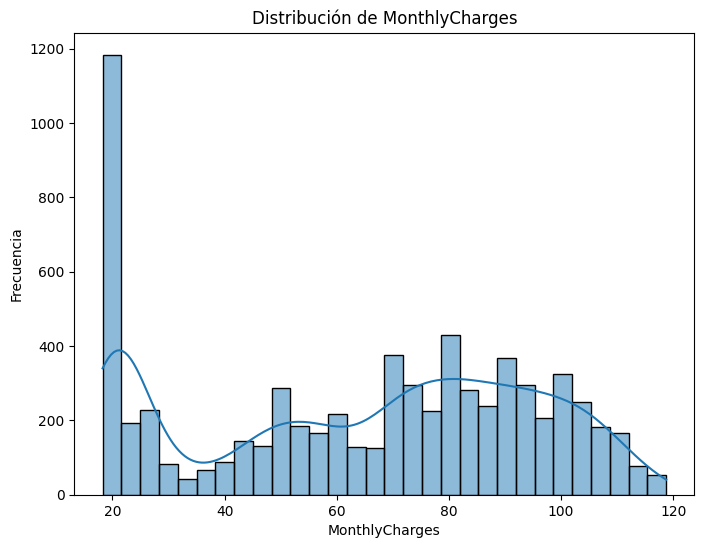


Análisis completado.


In [14]:
# Gráfico de distribución para cada variable numérica
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

print("\nAnálisis completado.")


In [ ]:
# Matriz de correlación
plt.figure(figsize=(20, 15))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Correlación específica con Churn
churn_corr = corr['Churn'].sort_values(ascending=False)
print(churn_corr)

In [113]:
# Data Preprocessing

# etiquetado binario
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender']) # Male = 1, Fem = 0
df['Partner'] = le.fit_transform(df['Partner']) #Yes = 1
df['Dependents'] = le.fit_transform(df['Dependents']) # Yes = 1
df['PhoneService'] = le.fit_transform(df['PhoneService'])
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])
df['Churn'] = le.fit_transform(df['Churn']) # Yes = 1

# One hot Encoding
df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 'OnlineSecurity',
                                 'OnlineBackup','DeviceProtection', 'TechSupport',
                                 'Contract', 'PaymentMethod','StreamingMovies', 'StreamingTV'], drop_first=False)

df = df.apply(lambda x: x.astype(int) if x.dtypes == 'bool' else x) # convert booleans to 1 and 0

# columna inncesaria
df = df.drop(columns = ['customerID'])

#print
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,1,0,1,0,0,1,0,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,1,1,0,0,1,0,0
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,1,1,0,0,1,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,0,1,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,1,0,1,0,0,1,0,0


KeyError: 'Contract'

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7032 non-null   float64
 9   Churn                                    7043 non-null   int64  
 10  MultipleLines_No                         7043 no

In [68]:
for col in df.columns:
    if df[col].dtype == 'object':  # Si la columna es de tipo string
        print(f"Valores únicos en '{col}': {df[col].unique()}")


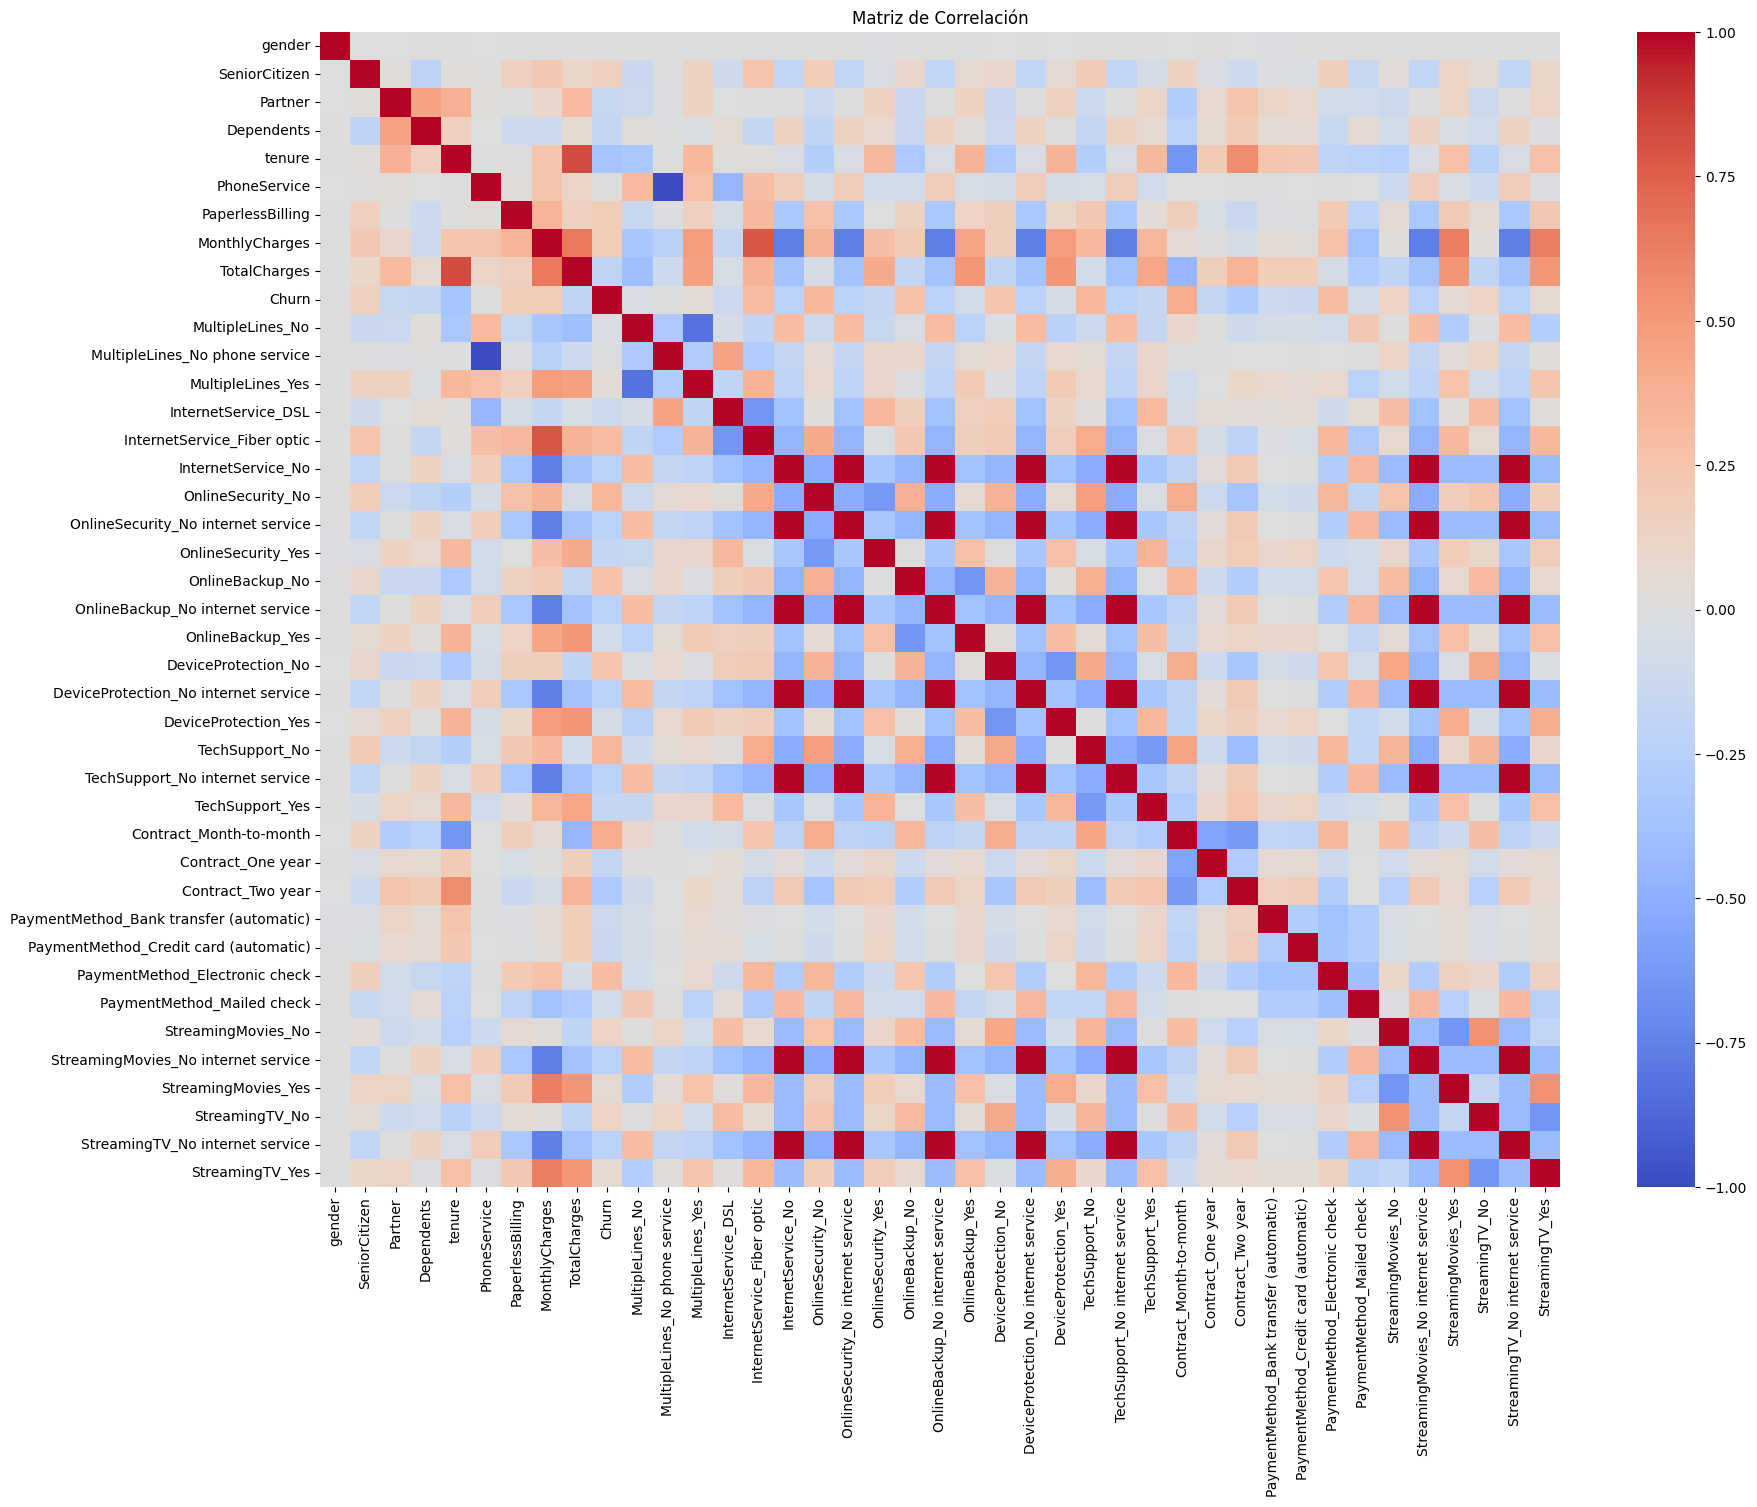

Churn                                      1.000000
Contract_Month-to-month                    0.405103
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
MonthlyCharges                             0.193356
PaperlessBilling                           0.191825
SeniorCitizen                              0.150889
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
PhoneService                               0.011942
gender                                    -0.008612
MultipleLines_No phone service            -0.011942
MultipleLine

In [89]:
# Matriz de correlación
plt.figure(figsize=(20, 15))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Correlación específica con Churn
churn_corr = corr['Churn'].sort_values(ascending=False)
print(churn_corr)

In [90]:
from sklearn.model_selection import train_test_split

# Separar características y objetivo
X = df.drop('Churn', axis=1)
y = df['Churn']

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Inicializar el modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf.fit(X_train, y_train)

# Predicciones
y_pred = rf.predict(X_test)

# Evaluación del modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1368  184]
 [ 289  272]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1552
           1       0.60      0.48      0.53       561

    accuracy                           0.78      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.76      0.78      0.77      2113



In [103]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Definir una paleta de colores personalizada para Churn
palette = {0: 'blue', 1: 'red'}

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=df,
    x='TotalCharges',
    y='tenure',
    hue='Churn',
    style='Contract_Month-to-month',
    palette=palette,
    markers={'Month-to-month': 'o', 'Other': 's'},  # Círculo para Month-to-month, cuadrado para otros
    alpha=0.7,
    edgecolor='w',
    s=100
)

# Personalizar el título y etiquetas
plt.title('Churn vs TotalCharges y Tenure por Tipo de Contrato', fontsize=16)
plt.xlabel('Total Charges', fontsize=14)
plt.ylabel('Tenure (meses)', fontsize=14)

# Personalizar la leyenda
plt.legend(title='Churn / Tipo de Contrato', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


ValueError: These `markers` levels are missing values: {0, 1}

<Figure size 1200x800 with 0 Axes>

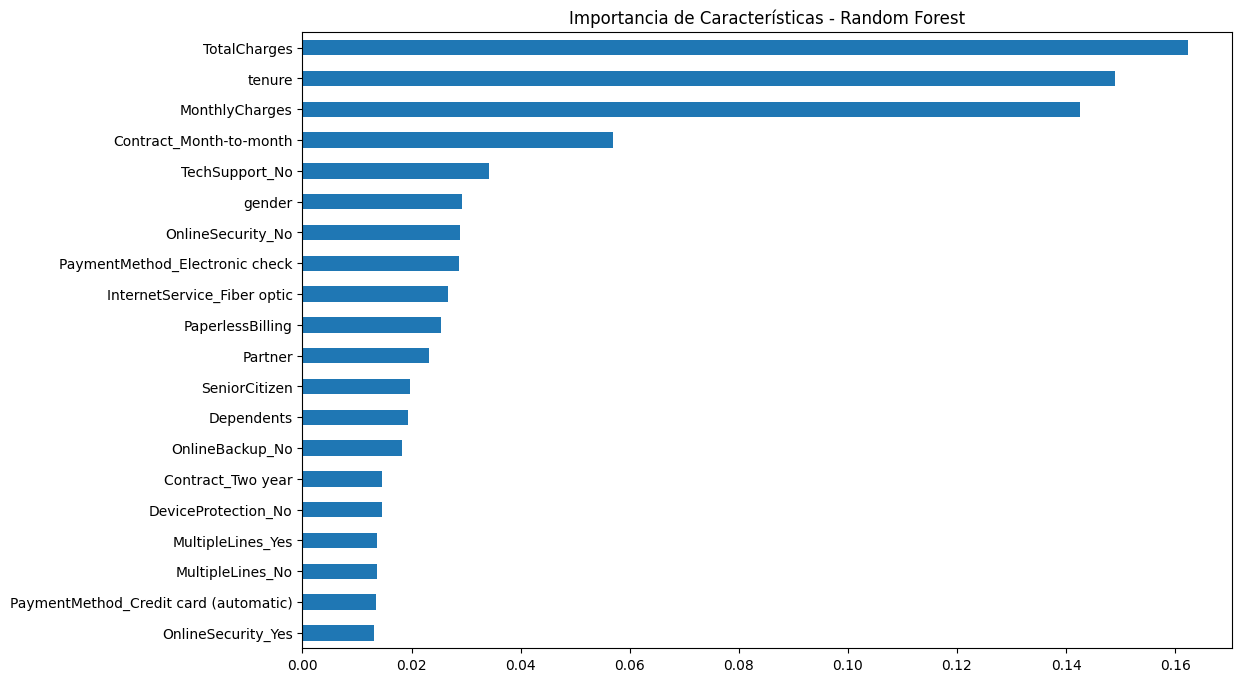

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener la importancia de las características
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

# Plot de las características más importantes
plt.figure(figsize=(12, 8))
importances_sorted.head(20).plot(kind='barh')
plt.title('Importancia de Características - Random Forest')
plt.gca().invert_yaxis()
plt.show()


In [93]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


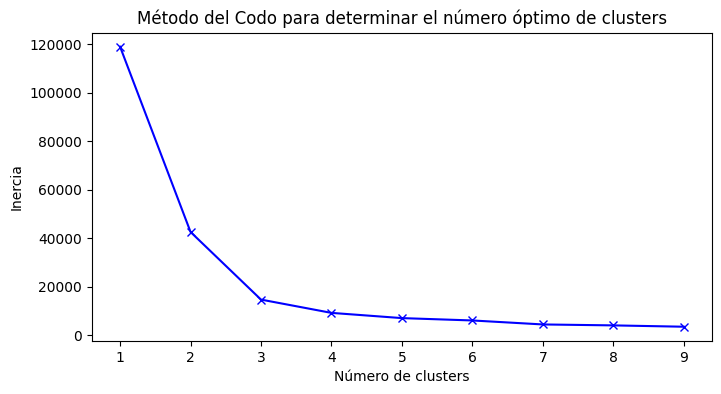

In [94]:
# Tasa de Churn por cluster
cluster_churn = df.groupby('Cluster')['Churn'].mean()
print(cluster_churn)

# Visualización
sns.barplot(x=cluster_churn.index, y=cluster_churn.values)
plt.xlabel('Cluster')
plt.ylabel('Tasa de Churn')
plt.title('Tasa de Churn por Cluster')
plt.show()



Cluster
0    0.147034
1    0.074050
2    0.446310
Name: Churn, dtype: float64


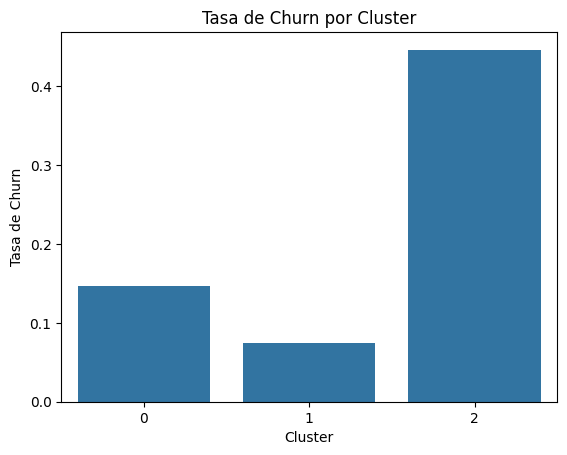

In [95]:
# Tasa de Churn por cluster
cluster_churn = df.groupby('Cluster')['Churn'].mean()
print(cluster_churn)

# Visualización
sns.barplot(x=cluster_churn.index, y=cluster_churn.values)
plt.xlabel('Cluster')
plt.ylabel('Tasa de Churn')
plt.title('Tasa de Churn por Cluster')
plt.show()


In [96]:
# Calcular estadísticas descriptivas por cluster
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


           gender  SeniorCitizen   Partner  Dependents     tenure  \
Cluster                                                             
0        0.502966       0.183475  0.696610    0.369492  54.394492   
1        0.510485       0.034076  0.483617    0.421363  30.547182   
2        0.503326       0.208109  0.323092    0.188470  16.789357   

         PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  \
Cluster                                                                 
0            0.904661          0.663559       88.591610   4845.147395   
1            1.000000          0.292267       21.079194    671.582374   
2            0.855242          0.683877       68.062575   1147.260833   

            Churn  ...  PaymentMethod_Bank transfer (automatic)  \
Cluster            ...                                            
0        0.147034  ...                                 0.326271   
1        0.074050  ...                                 0.217562   
2        0.446310  .

In [97]:
# Calcular la diferencia de medias entre los clusters
for col in df.columns:
    if col not in ['Churn', 'Cluster']:
        print(f'Variable: {col}')
        print(df.groupby('Cluster')[col].mean())
        print('---')


Variable: gender
Cluster
0    0.502966
1    0.510485
2    0.503326
Name: gender, dtype: float64
---
Variable: SeniorCitizen
Cluster
0    0.183475
1    0.034076
2    0.208109
Name: SeniorCitizen, dtype: float64
---
Variable: Partner
Cluster
0    0.696610
1    0.483617
2    0.323092
Name: Partner, dtype: float64
---
Variable: Dependents
Cluster
0    0.369492
1    0.421363
2    0.188470
Name: Dependents, dtype: float64
---
Variable: tenure
Cluster
0    54.394492
1    30.547182
2    16.789357
Name: tenure, dtype: float64
---
Variable: PhoneService
Cluster
0    0.904661
1    1.000000
2    0.855242
Name: PhoneService, dtype: float64
---
Variable: PaperlessBilling
Cluster
0    0.663559
1    0.292267
2    0.683877
Name: PaperlessBilling, dtype: float64
---
Variable: MonthlyCharges
Cluster
0    88.591610
1    21.079194
2    68.062575
Name: MonthlyCharges, dtype: float64
---
Variable: TotalCharges
Cluster
0    4845.147395
1     671.582374
2    1147.260833
Name: TotalCharges, dtype: float64
---
V

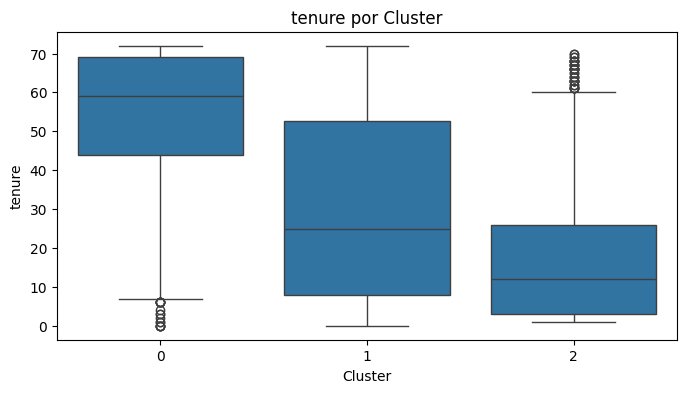

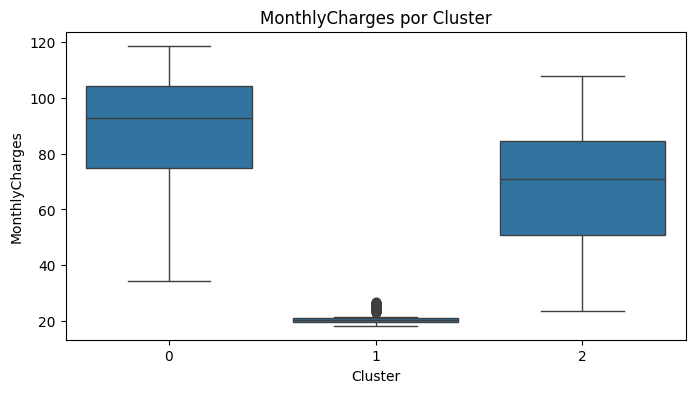

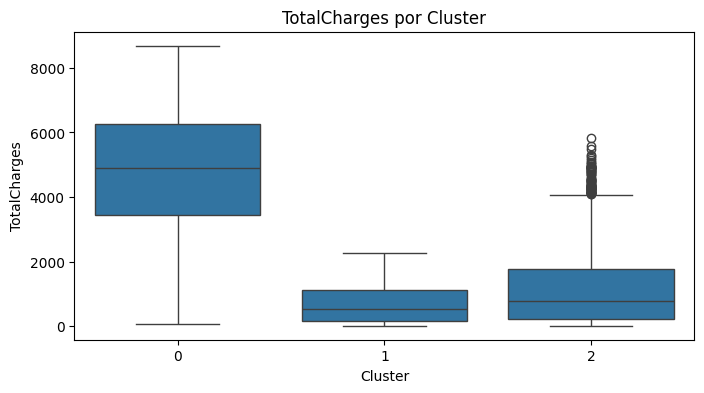

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']  # Ajusta según tus columnas

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Cluster', y=col, data=df)
    plt.title(f'{col} por Cluster')
    plt.show()


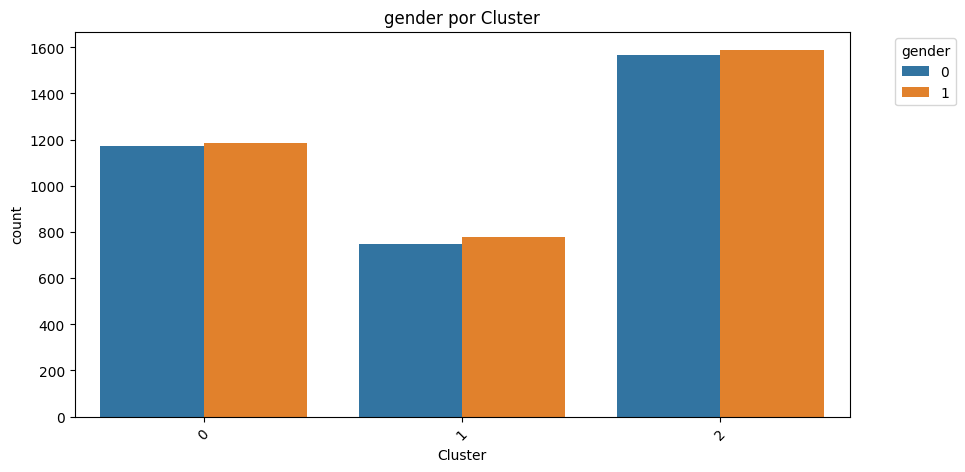

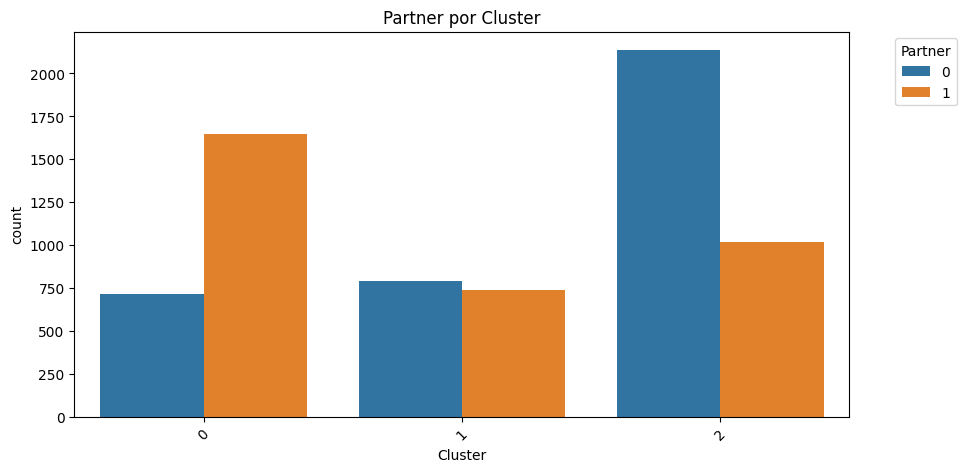

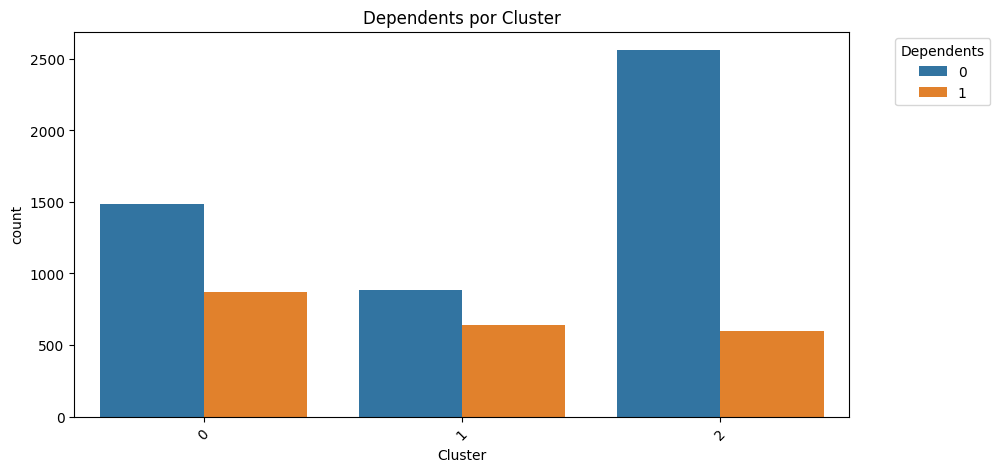

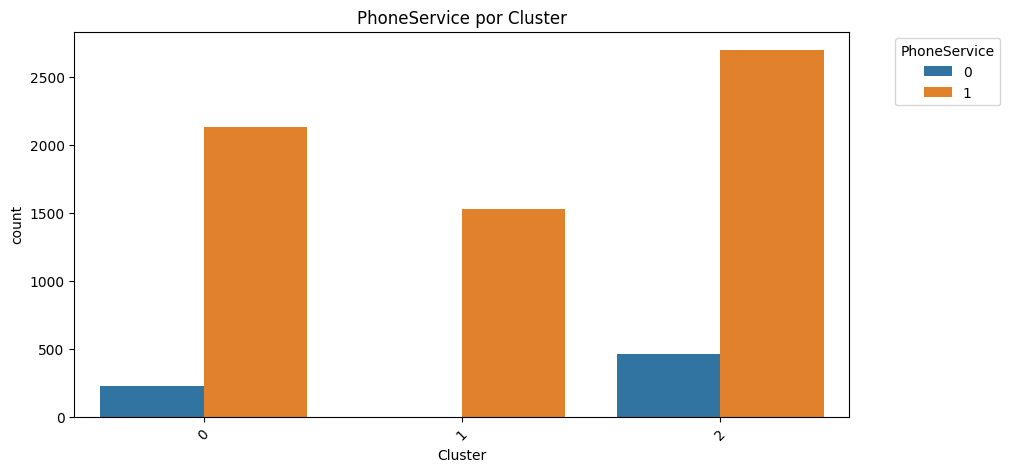

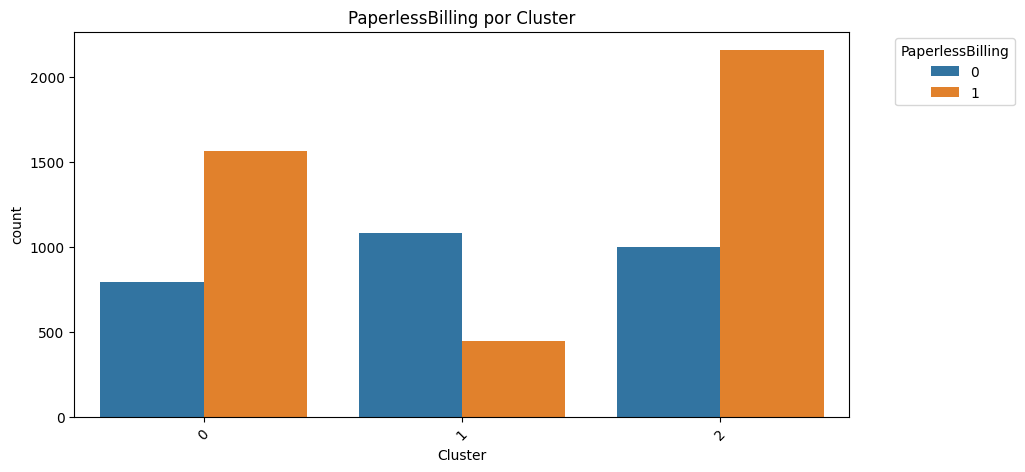

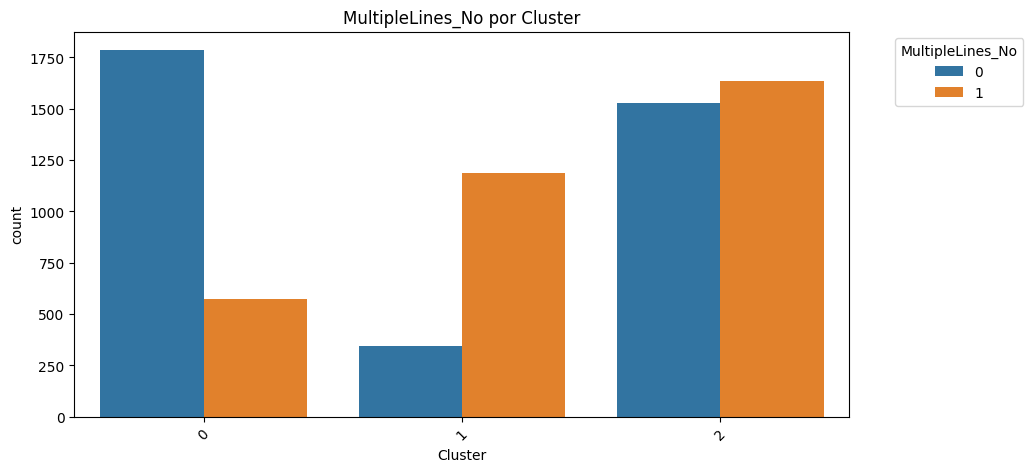

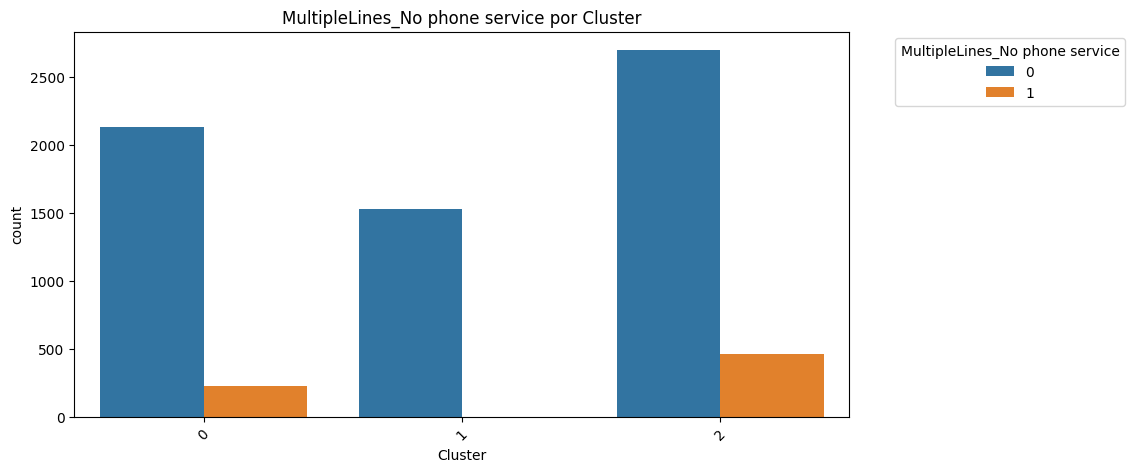

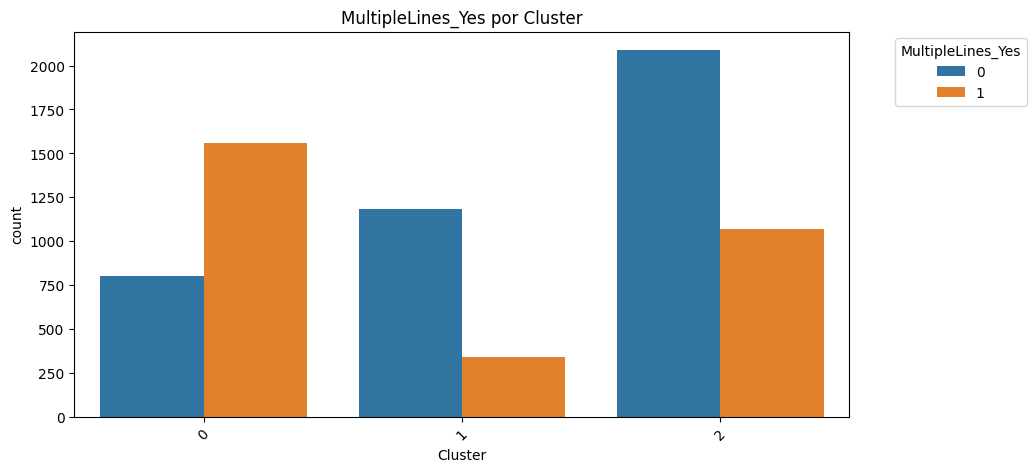

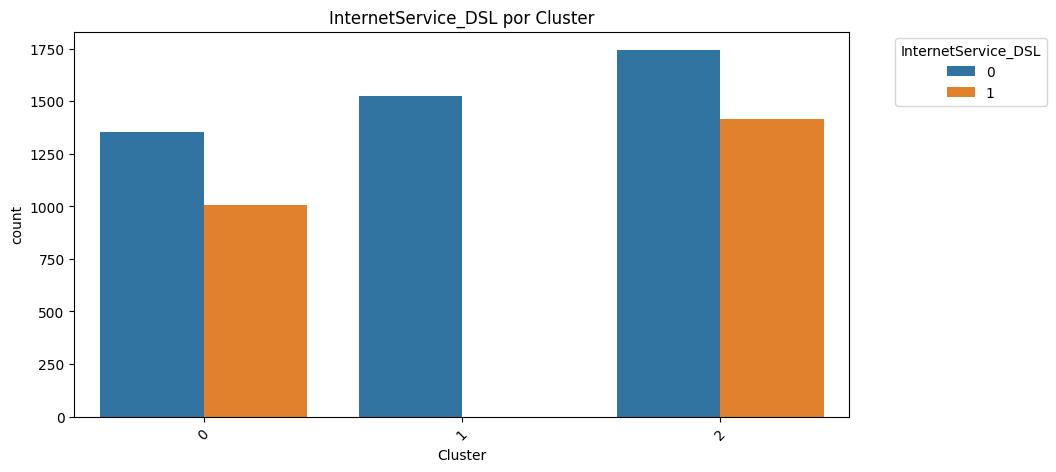

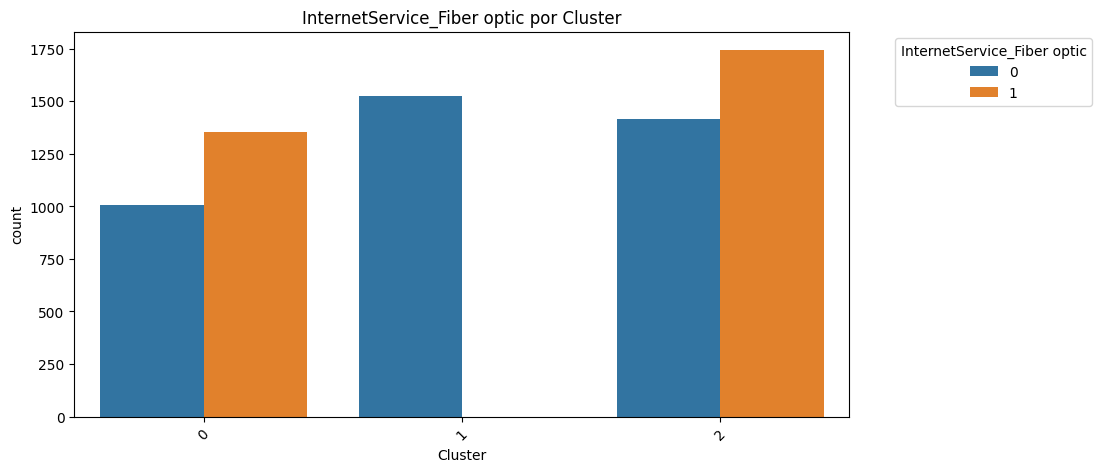

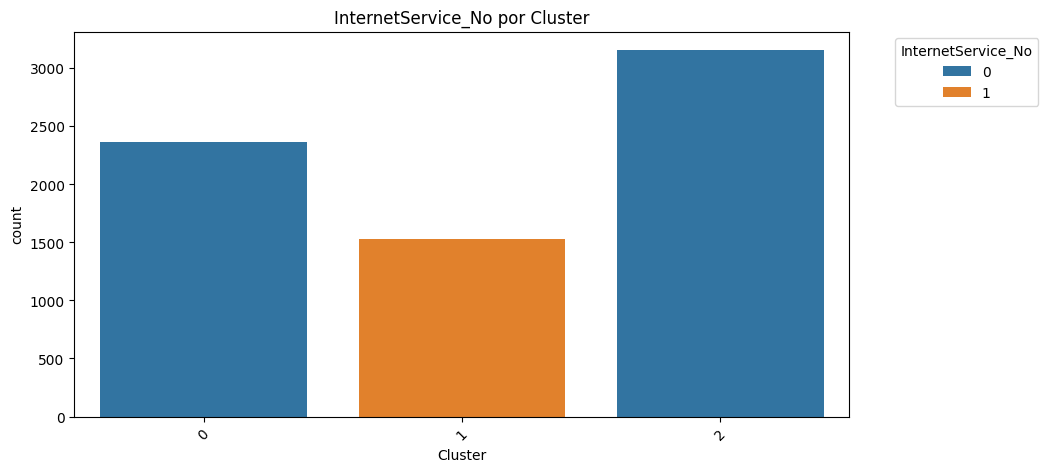

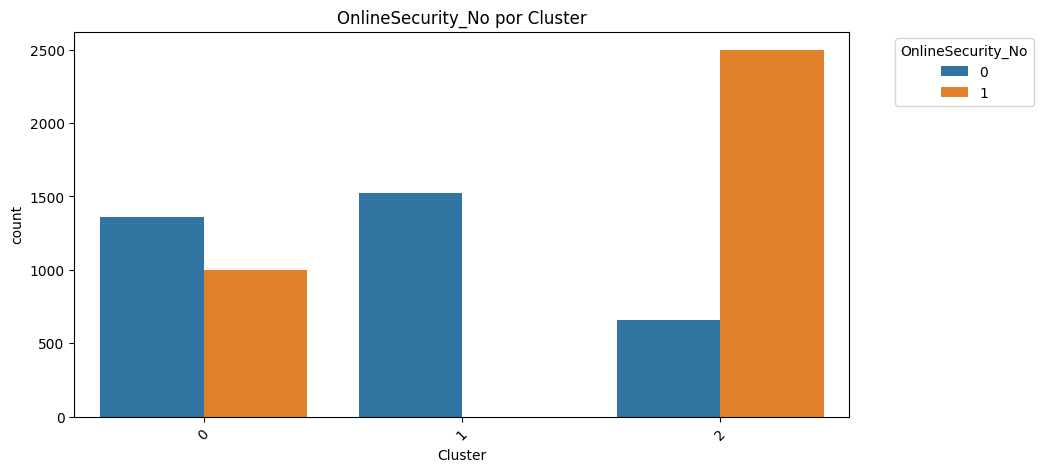

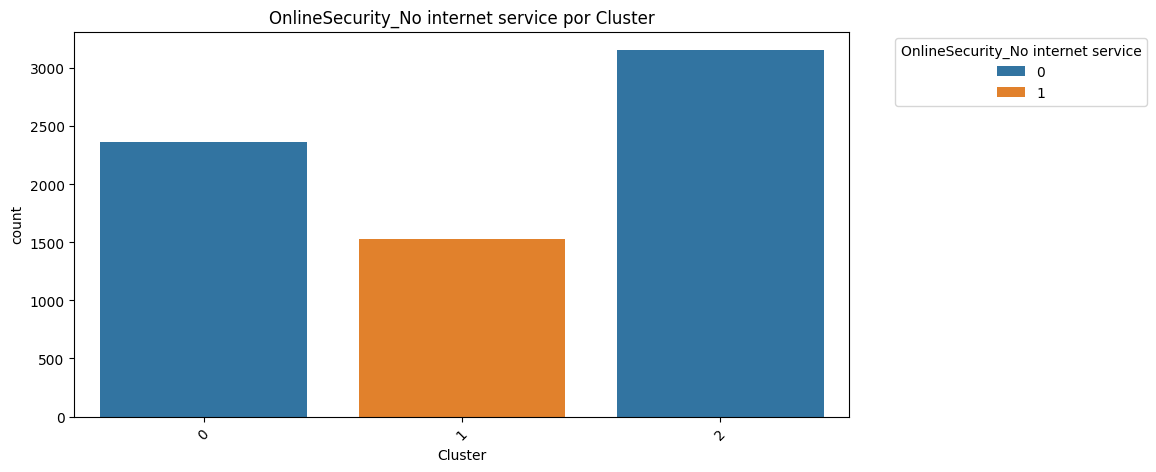

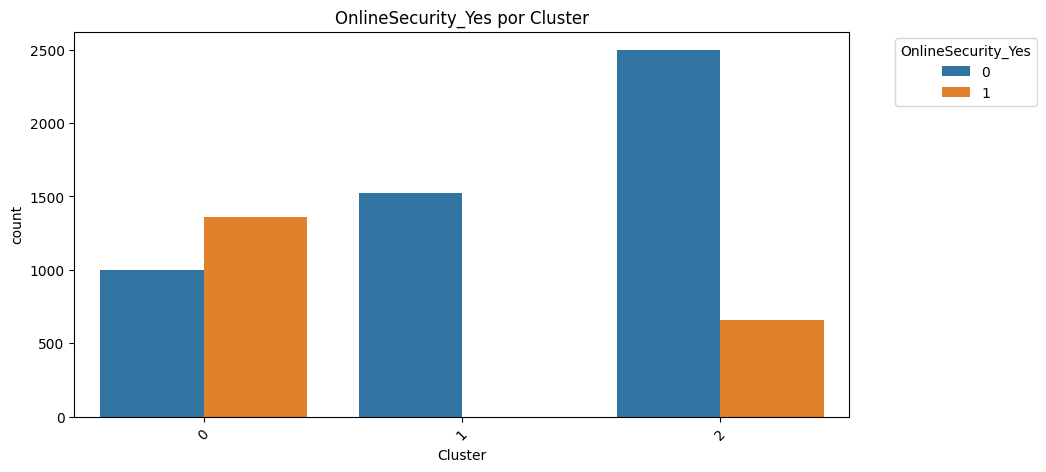

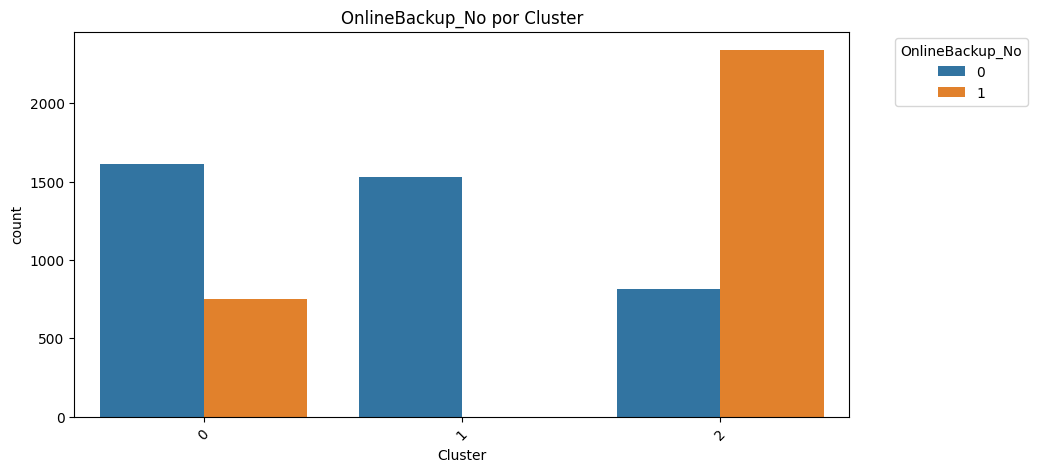

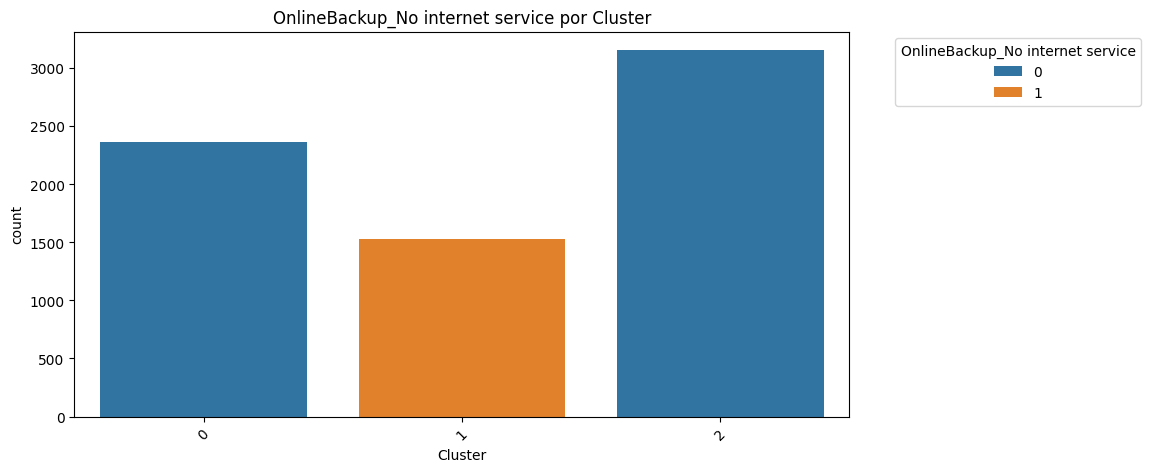

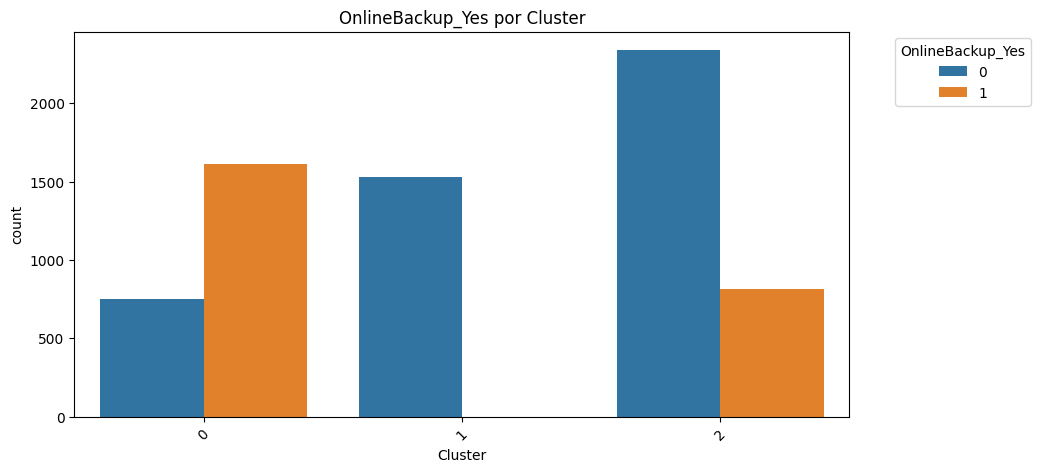

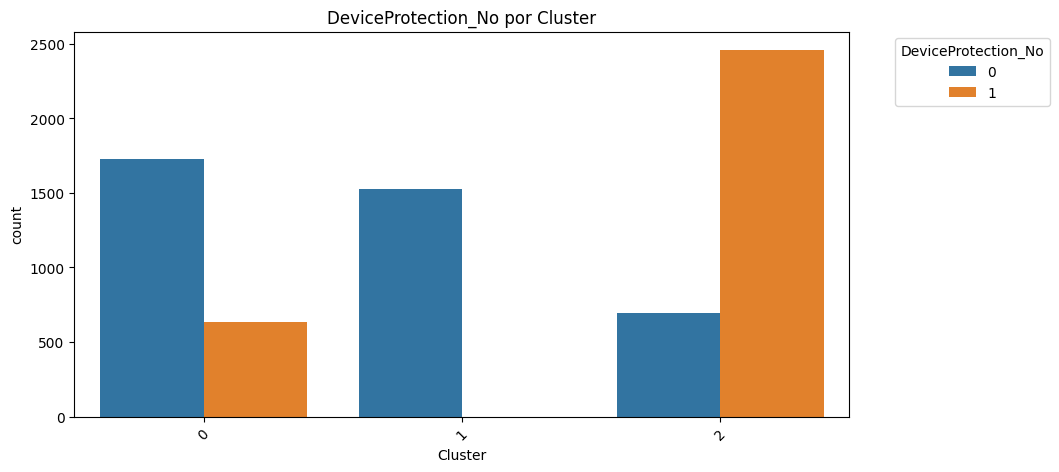

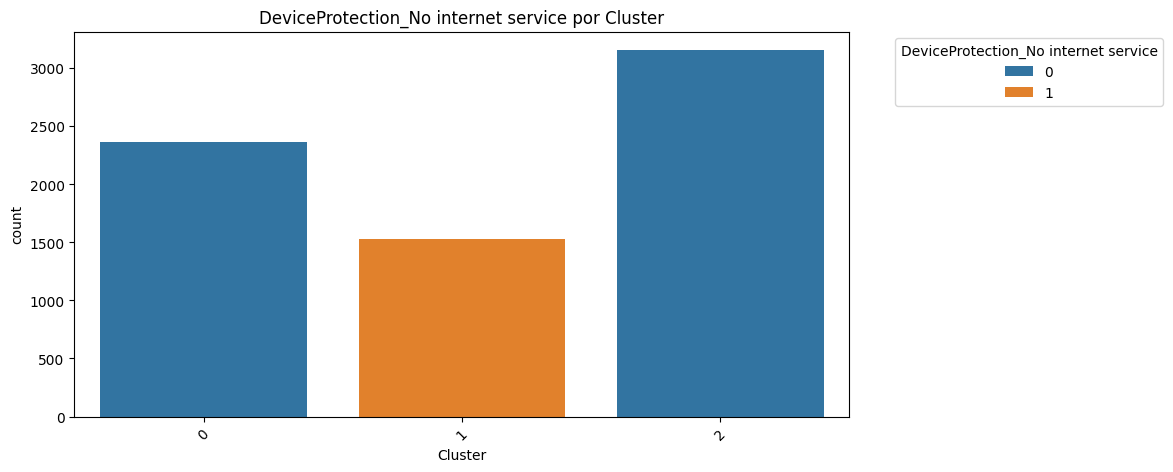

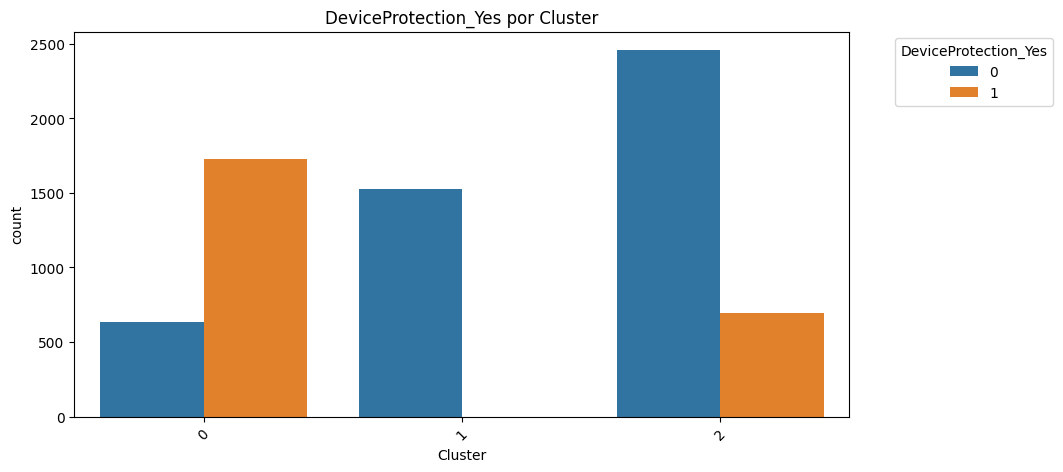

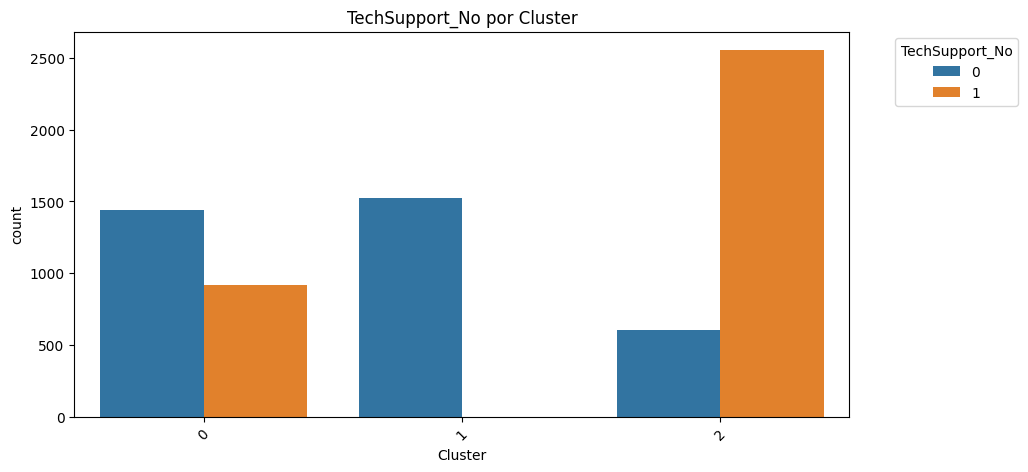

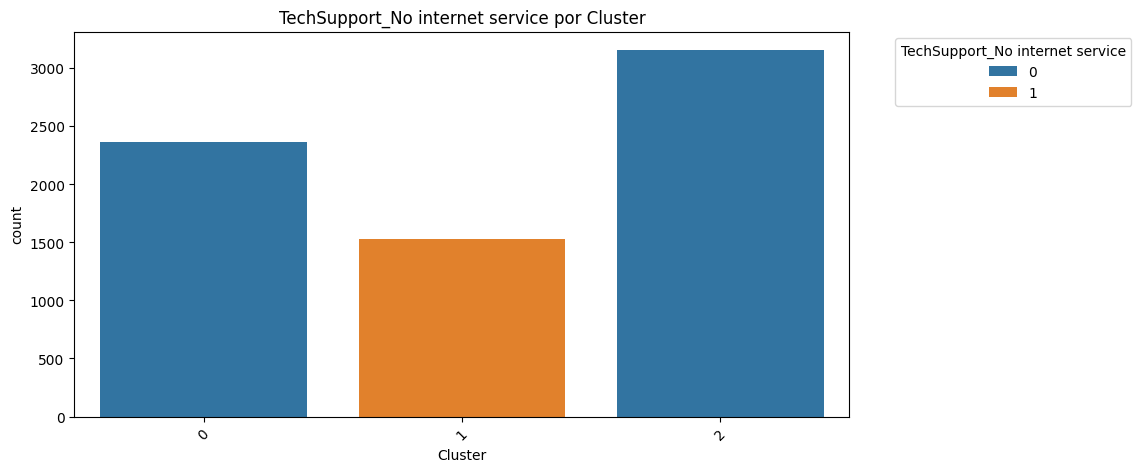

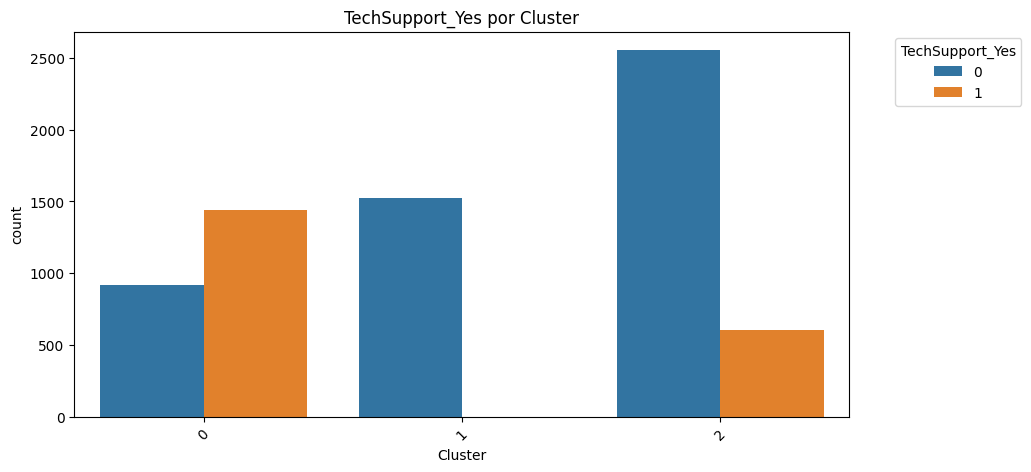

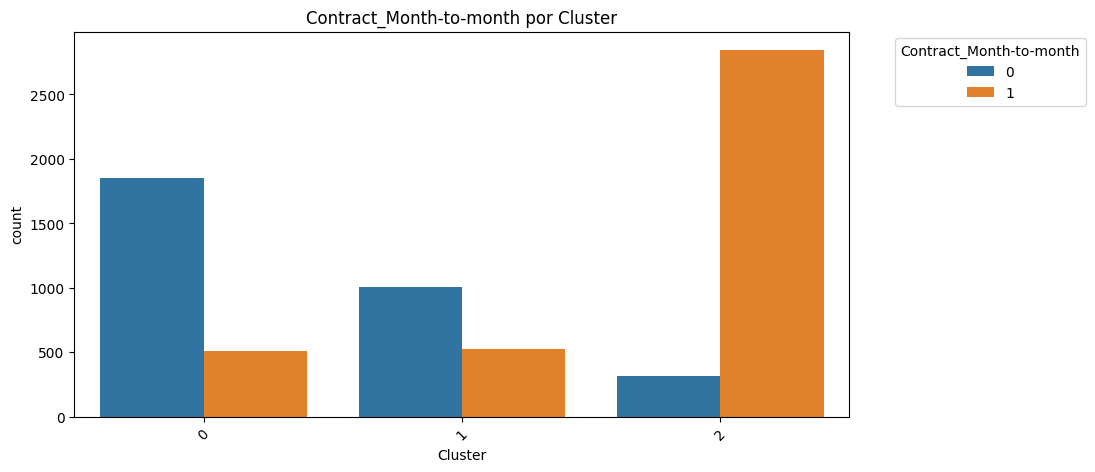

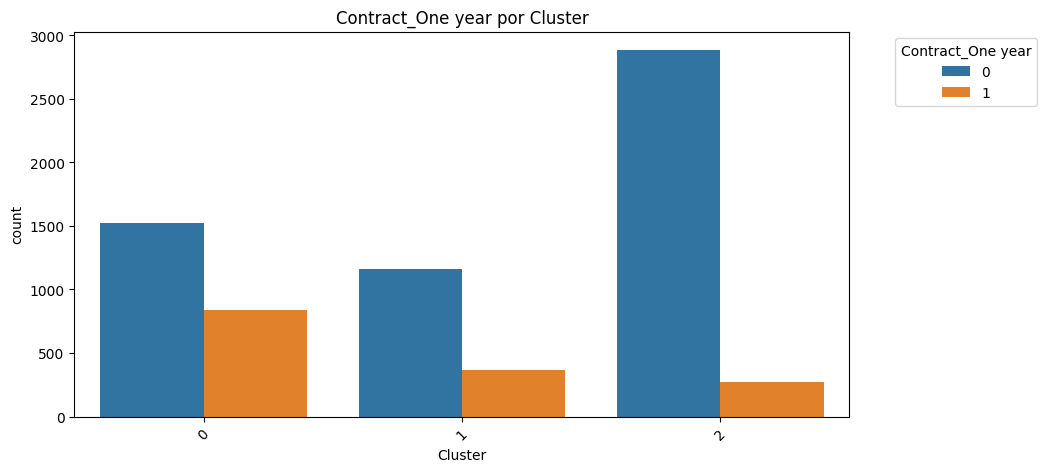

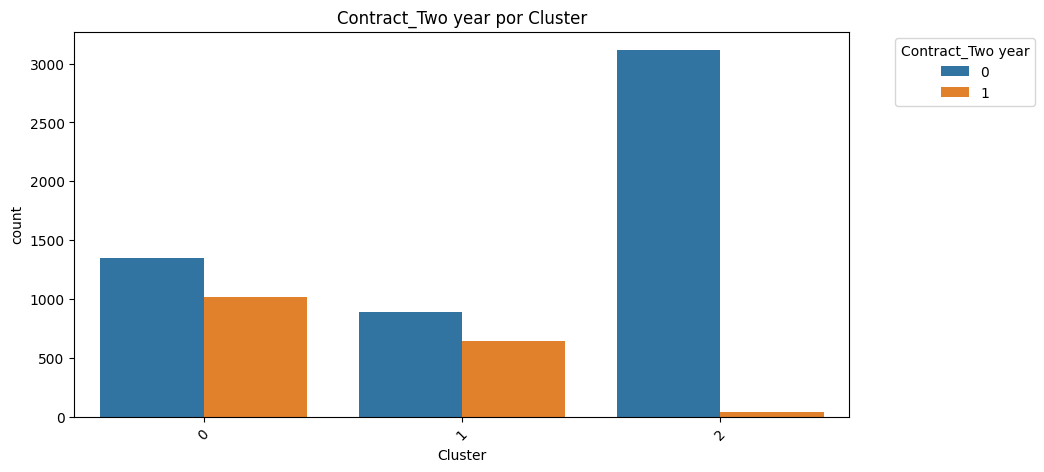

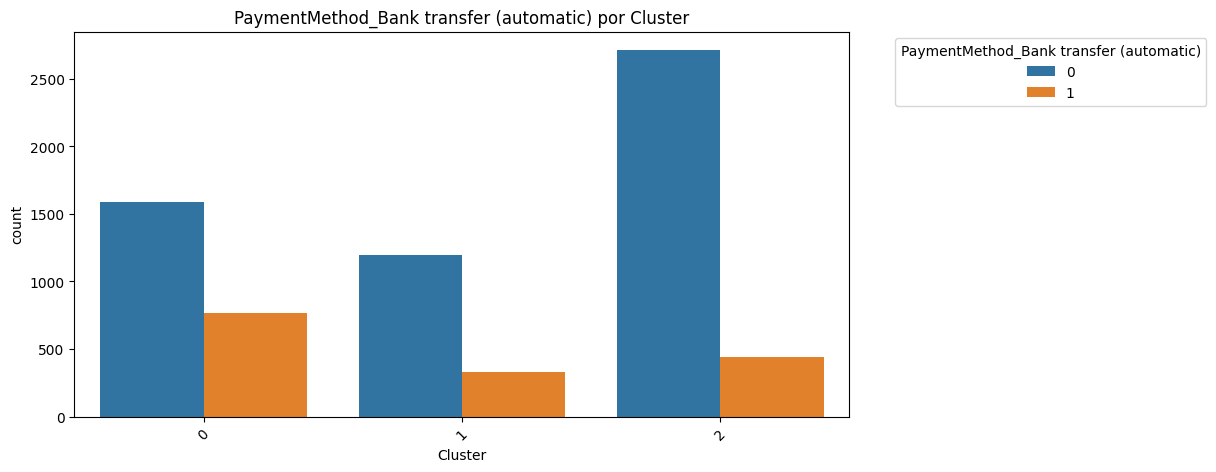

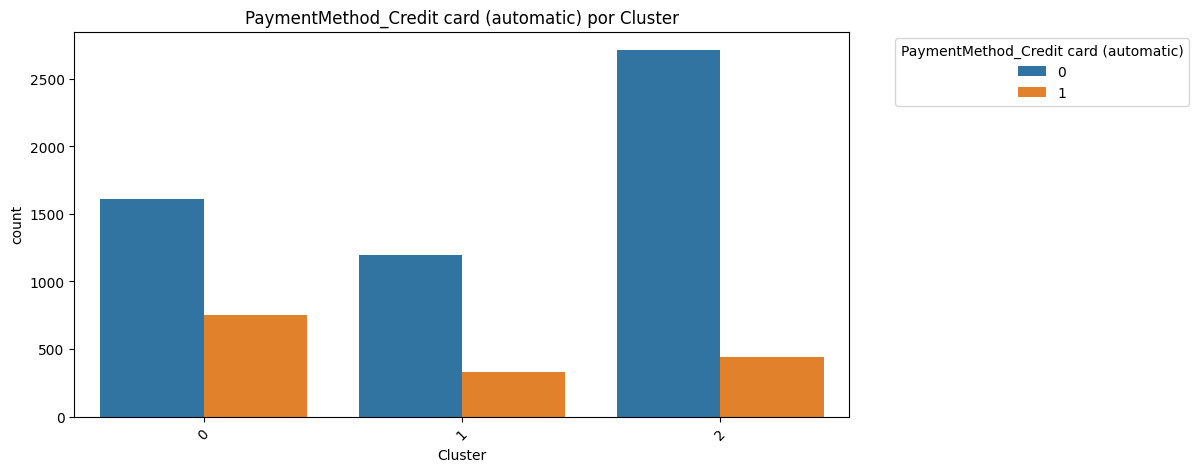

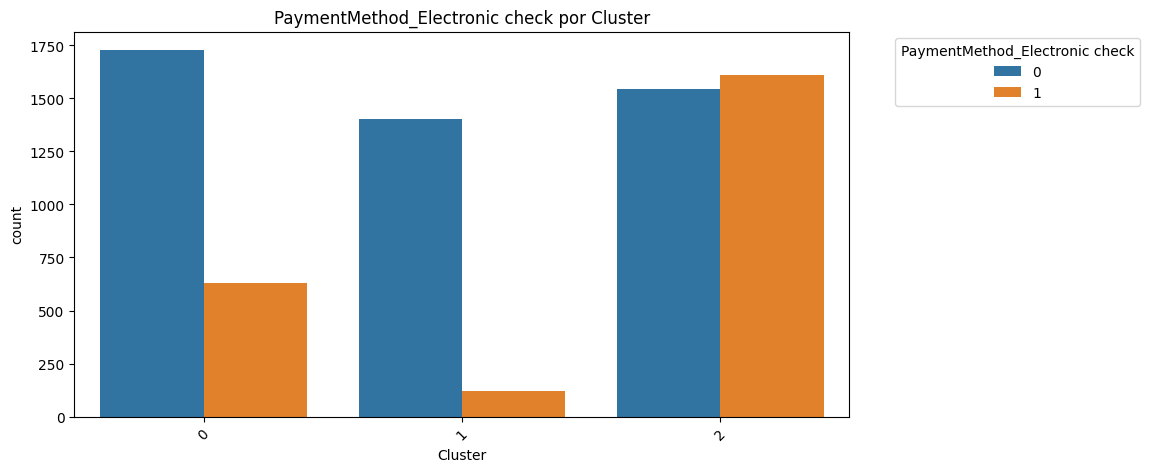

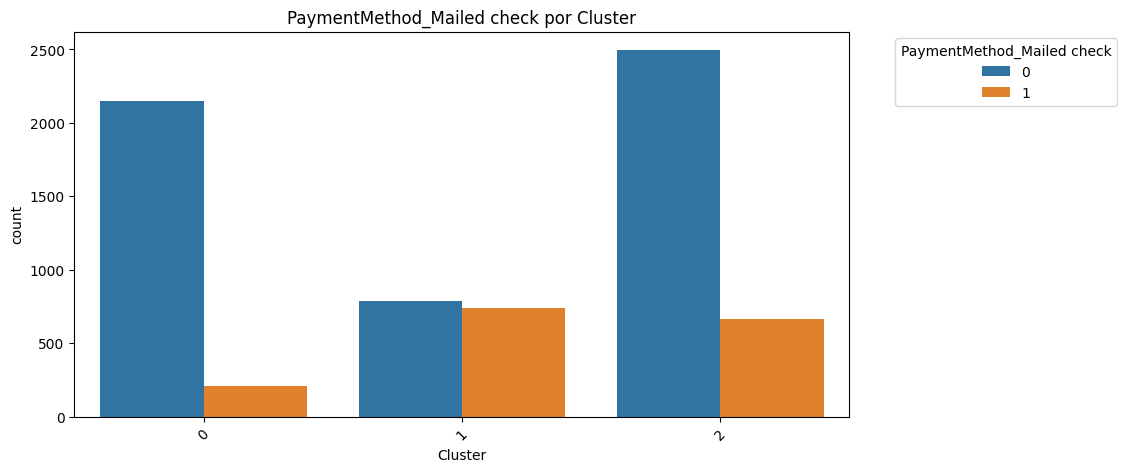

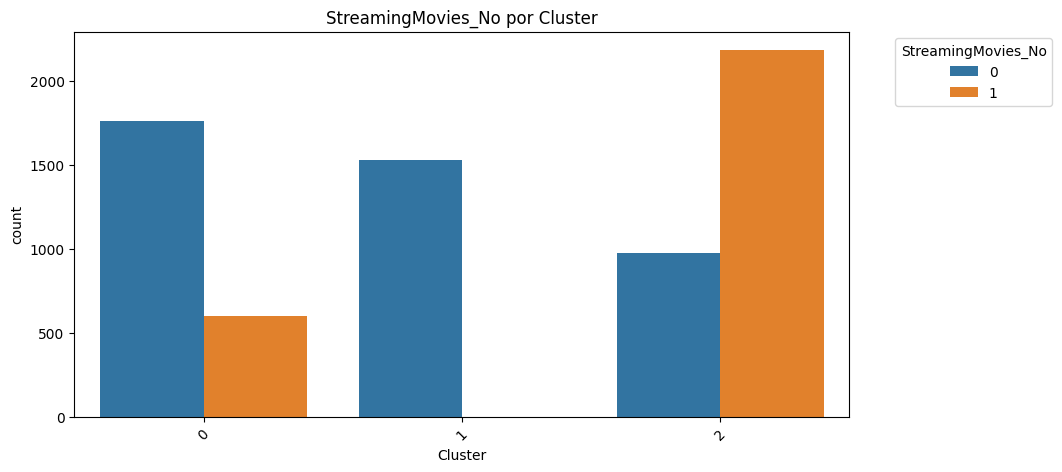

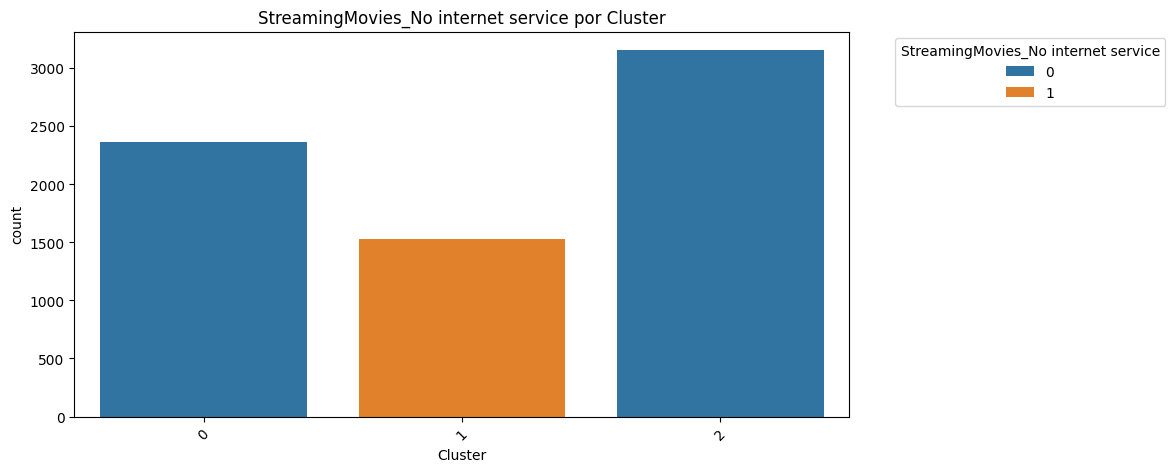

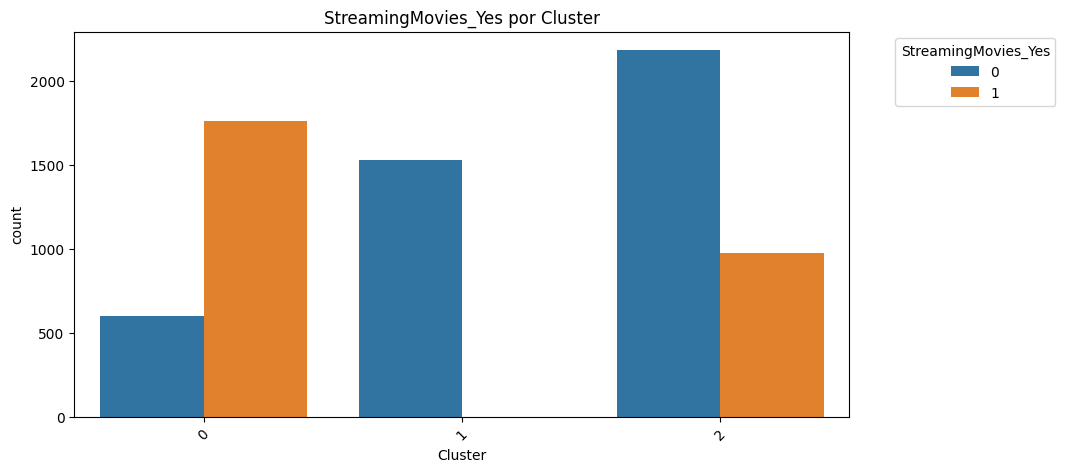

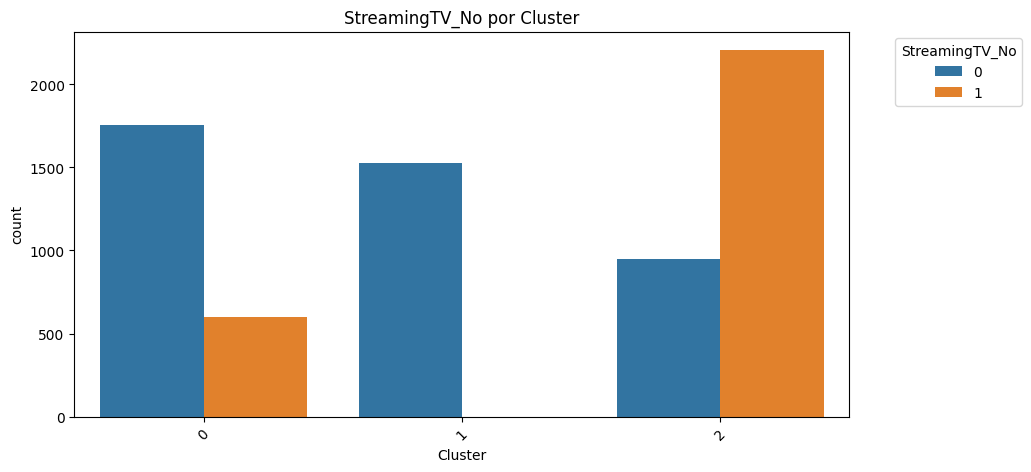

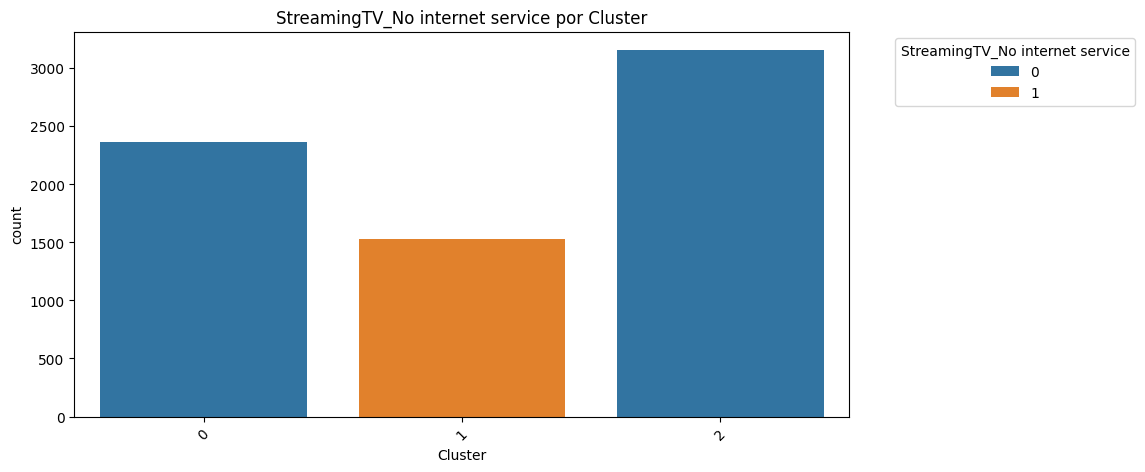

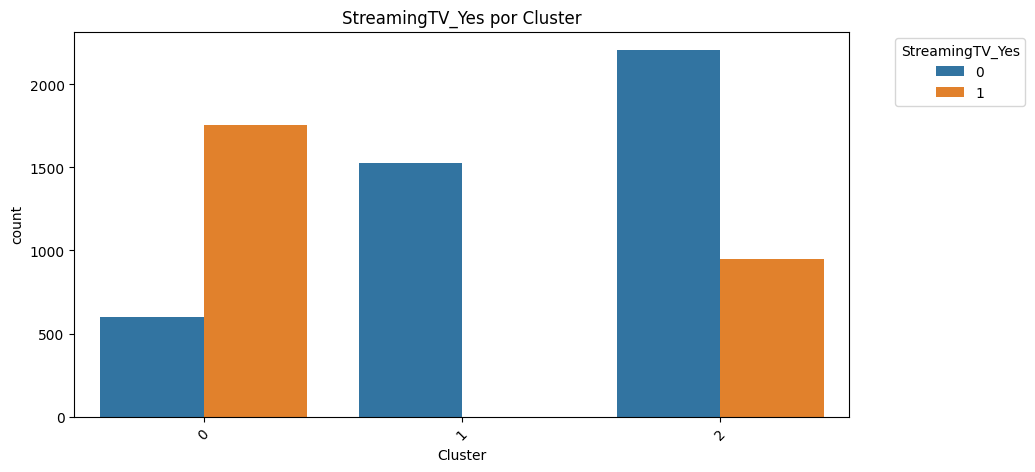

In [99]:
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling'] + [
    col for col in df.columns if col.startswith('MultipleLines_') or
    col.startswith('InternetService_') or
    col.startswith('OnlineSecurity_') or
    col.startswith('OnlineBackup_') or
    col.startswith('DeviceProtection_') or
    col.startswith('TechSupport_') or
    col.startswith('Contract_') or
    col.startswith('PaymentMethod_') or
    col.startswith('StreamingMovies_') or
    col.startswith('StreamingTV_')]

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x='Cluster', hue=col, data=df)
    plt.title(f'{col} por Cluster')
    plt.xticks(rotation=45)
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


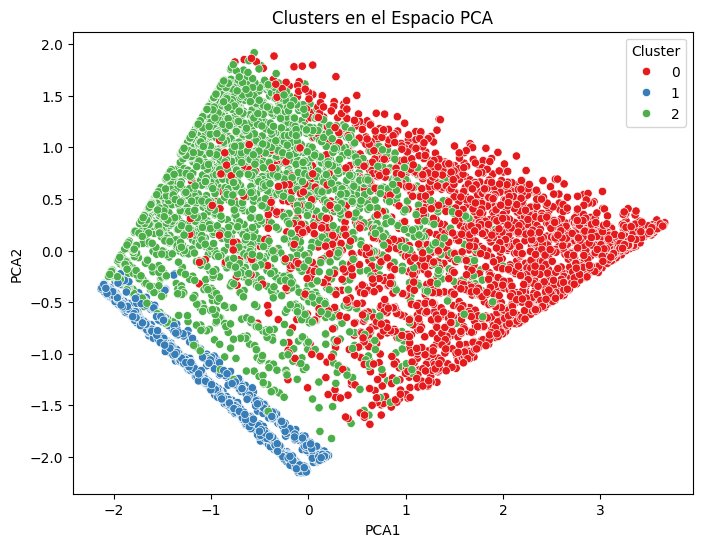

In [101]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Seleccionar características numéricas para PCA
features = ['tenure', 'MonthlyCharges', 'TotalCharges']  # Ajusta según tus datos

X = df[features]
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

df['PCA1'] = principal_components[:, 0]
df['PCA2'] = principal_components[:, 1]

# Visualización
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set1')
plt.title('Clusters en el Espacio PCA')
plt.show()


## Pregunta 1

1) Carga diabetes.csv en un DataFrame df_diabetes.